In [ ]:
#EXPT  9

pca implementation 

Step 1-5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [4]:
# Generate a sample dataset
np.random.seed(42)

data = np.random.rand(10, 3) * 10  # 10 samples, 3 features

df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])
print(df.head())

   Feature1  Feature2  Feature3
0  3.745401  9.507143  7.319939
1  5.986585  1.560186  1.559945
2  0.580836  8.661761  6.011150
3  7.080726  0.205845  9.699099
4  8.324426  2.123391  1.818250


In [5]:
# Step 1: Standardize the dataset
scaler = StandardScaler()

standardized_data = scaler.fit_transform(df)

In [6]:
# Step 2: input covariance matrix
cov_matrix = np.cov(standardized_data.T)

In [7]:
# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [8]:
# Step 4: Sort eigenvalues and select top ones
sorted_indices = np.argsort(eigenvalues)[::-1]  # Descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [9]:
# Selecting top 2 principal components
top_k = 2
selected_eigenvectors = eigenvectors[:, :top_k]

In [11]:
# Step 5: Transform data
reduced_data = standardized_data.dot(selected_eigenvectors)
# Using sklearn PCA for verification
pca = PCA(n_components=2)
sklearn_pca_result = pca.fit_transform(standardized_data)



In [12]:
# Print results
print("Manually computed PCA result:")

print(reduced_data)

print("\nSklearn PCA result:")

print(sklearn_pca_result)

Manually computed PCA result:
[[ 1.46953672  0.41366288]
 [-1.34583425 -0.64980084]
 [ 2.14512076  0.15355853]
 [-1.3731421   2.1764038 ]
 [-1.9100207  -0.68569008]
 [ 0.49640736  0.50732363]
 [-0.21736385  0.74969908]
 [ 0.48676864  0.00654899]
 [ 0.47638503 -1.18400566]
 [-0.22785763 -1.48770034]]

Sklearn PCA result:
[[-1.46953672  0.41366288]
 [ 1.34583425 -0.64980084]
 [-2.14512076  0.15355853]
 [ 1.3731421   2.1764038 ]
 [ 1.9100207  -0.68569008]
 [-0.49640736  0.50732363]
 [ 0.21736385  0.74969908]
 [-0.48676864  0.00654899]
 [-0.47638503 -1.18400566]
 [ 0.22785763 -1.48770034]]


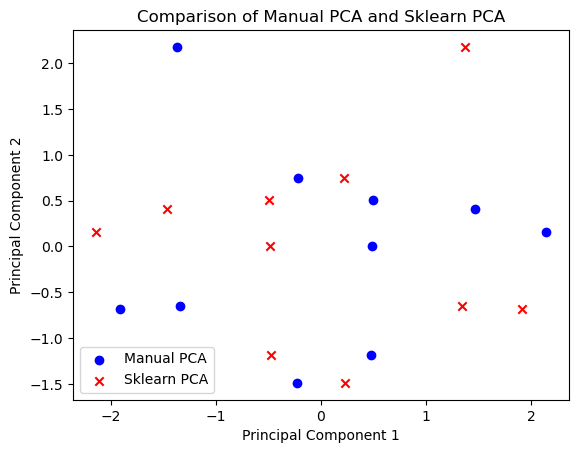

In [14]:
# Scatter plot of PCA results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Manual PCA', marker='o', color='blue')

plt.scatter(sklearn_pca_result[:, 0], sklearn_pca_result[:, 1], label='Sklearn PCA', marker='x', color='red')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend()

plt.title('Comparison of Manual PCA and Sklearn PCA')
plt.show()